In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import itertools
from pylab import *


In [40]:
#import the xyz files and get the atoms in a list
CO2_Ru = pd.read_csv('CO2_Ru.csv', sep=',', header=None)
print(CO2_Ru.values)

[[0.005979288 0.99249146 0.821664669 'Ru']
 [0.33942587 0.99240554 0.82141084 'Ru']
 [0.672688078 0.9924962509999999 0.82170573 'Ru']
 [0.005669844 0.242584883 0.821056225 'Ru']
 [0.339454236 0.24254530800000002 0.8214742970000001 'Ru']
 [0.67263436 0.24246511699999998 0.8217243940000001 'Ru']
 [0.0060477330000000004 0.49245470799999996 0.8215601509999999 'Ru']
 [0.339341589 0.492474495 0.8216945309999999 'Ru']
 [0.672677162 0.492498449 0.821646005 'Ru']
 [0.00605524 0.742499495 0.8216945309999999 'Ru']
 [0.339354032 0.742450547 0.821672135 'Ru']
 [0.67272939 0.74245992 0.821668402 'Ru']
 [0.155695856 0.200304108 0.953644797 'C']
 [0.242287355 0.078011041 0.9530438179999999 'O']
 [0.069166332 0.322507818 0.954249508 'O']]


In [41]:
# Brilliant.  Moving on.  
# Get the lattice vectors.
lattice_vectors = pd.read_csv('lattice_vectors.csv', sep=',', header=None)
print(lattice_vectors.values)


[[ 8.31557575  0.          0.        ]
 [ 5.54371717  9.60199979  0.        ]
 [ 0.          0.         26.78963917]]


In [42]:
# Convert to Angstroms instead of fractions of the unit cell vectors.
# An N-atom by 3 matrix times 3x3 lattice matrix yields an Nx3 matrix.
CO2_Ru_angs=np.matmul(CO2_Ru.iloc[:, 0:3],lattice_vectors)
CO2_Ru_angs = np.array(CO2_Ru_angs)
print(CO2_Ru_angs)

[[ 5.55181317  9.52990279 22.0121    ]
 [ 8.32413716  9.52907779 22.00530001]
 [11.09590717  9.5299488  22.01320001]
 [ 1.39197     2.3293     21.99580001]
 [ 4.16736     2.32892    22.007     ]
 [ 6.9375      2.32815    22.01370001]
 [ 2.78032     4.72855    22.0093    ]
 [ 5.55196     4.72874    22.01289999]
 [ 8.32397     4.72897    22.0116    ]
 [ 4.16656     7.12948    22.01289999]
 [ 6.93786     7.12901    22.01230001]
 [ 9.71012     7.1291     22.01220001]
 [ 2.40513001  1.92332    25.54780001]
 [ 2.44723     0.749062   25.5317    ]
 [ 2.36305     3.09672    25.564     ]]


In [43]:
# Slice off unnecessary z-space below.  Convert to atomic units of length.
CO2_Ru_angs[:, 2] = CO2_Ru_angs[:, 2] - 20
CO2_Ru_au = CO2_Ru_angs/0.52917721067121
print(CO2_Ru_au)

[[10.49140638 18.00890628  3.80231794]
 [15.73033946 18.00734725  3.78946783]
 [20.96822566 18.00899321  3.80439666]
 [ 2.63044207  4.40173906  3.77151541]
 [ 7.87516906  4.40102096  3.79268034]
 [13.109975    4.39956588  3.80534152]
 [ 5.25404334  8.93566448  3.79702671]
 [10.49168386  8.93602352  3.80382971]
 [15.73002358  8.93645816  3.80137307]
 [ 7.87365729 13.47276461  3.80382971]
 [13.1106553  13.47187644  3.80269591]
 [18.34946745 13.47204652  3.80250692]
 [ 4.54503701  3.63454806 10.48382261]
 [ 4.62459447  1.41552203 10.453398  ]
 [ 4.46551732  5.85195269 10.51443616]]


In [44]:
#Ready to start iterating?
a1 = 25
a2 = 25
a3 = 25
vertices = np.array([[ 0.,      0.,       0.],
                     [ 1/2*a1,  0.,       0.],
                     [ 0.,      1/2*a2,   0.],
                     [ 0.,      0.,       1/2*a3]])
print(vertices)

[[ 0.   0.   0. ]
 [12.5  0.   0. ]
 [ 0.  12.5  0. ]
 [ 0.   0.  12.5]]


In [62]:
CO2_Ru = np.array(CO2_Ru)
V_ext_oper = np.zeros((len(vertices),len(vertices)))
for i in range(len(vertices)):
    V_ext = 0
    for j in range(len(CO2_Ru_angs)):
        distance = np.sqrt(np.sum(np.power(CO2_Ru_au[j,:] - vertices[i,:],2)))
        pseudopotential = np.exp(-np.power(distance/(4),2))
        element = CO2_Ru[j,3]
        if element == 'Ru':
            charge = 44
        elif element == 'C':
            charge = 6
        elif element == 'O':
            charge = 8
        else:
            charge = 0.0
        V_ext = V_ext + charge*pseudopotential
    V_ext_oper[i,i] = V_ext
print(V_ext_oper)

[[3.63204998 0.         0.         0.        ]
 [0.         6.76332962 0.         0.        ]
 [0.         0.         1.99974201 0.        ]
 [0.         0.         0.         2.27477468]]


In [46]:
#fig = sns.heatmap(V_ext_oper, linewidth=0.5)
#plt.savefig('CO2_Ru_V_ext_beta.png',dpi=300)

In [47]:
# Great!  Now, move on to the kinetic energy.  
# The kinetic energy matrix will also be diagonal.
# There is one kinetic energy at each spatial point.
# It is a second derivative.

In [48]:
E_kin_oper = -(1/np.power((25/2),2))*np.array([[-6, 4, 4, 4],
                       [4, -2, 0, 0],
                       [4, 0, -2, 0],
                       [4, 0, 0, -2]])
print(E_kin_oper)

[[ 0.0384 -0.0256 -0.0256 -0.0256]
 [-0.0256  0.0128 -0.     -0.    ]
 [-0.0256 -0.      0.0128 -0.    ]
 [-0.0256 -0.     -0.      0.0128]]


In [49]:
#fig = sns.heatmap(E_kin_oper, linewidth=0.5)
#plt.savefig('CO2_Ru_E_kin.png',dpi=300)

In [50]:

first_type = np.exp(-np.power(1/2*a1,2))
second_type = np.exp(-(2*np.power(1/2*a1,2))) # Only valid with a cube.
V_e_e_oper = np.array([[0, first_type, first_type, first_type],
                      [first_type, 0, second_type, second_type],
                      [first_type, second_type, 0, second_type],
                      [first_type, second_type, second_type, 0]])
V_e_e_oper = np.zeros((4,4))
print(V_e_e_oper)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [51]:
#fig = sns.heatmap(V_e_e_oper, linewidth=0.5)
#plt.savefig('CO2_Ru_V_e_e.png',dpi=300)

In [60]:
V_nuc_scalar = 0
for k in range(len(CO2_Ru_au)):
    for l in range(len(CO2_Ru_au)):
        if k!=l:
            distance = np.sqrt(np.sum(np.power(CO2_Ru_au[k,:] - CO2_Ru_au[l,:],2)))
            element1 = CO2_Ru[k,3]
            if element1 == 'Ru':
                charge1 = 44
            elif element1 == 'C':
                charge1 = 6
            elif element1 == 'O':
                charge1 = 8
            else:
                charge1 = 0.0
            element2 = CO2_Ru[l,3]
            if element2 == 'Ru':
                charge2 = 44
            elif element2 == 'C':
                charge2 = 6
            elif element2 == 'O':
                charge2 = 8
            else:
                charge2 = 0.0
            pseudopotential = charge1*charge2*np.exp(-np.power(distance/(1),2))
            V_nuc_scalar += charge*pseudopotential
print(V_nuc_scalar)
V_nuc_oper = V_nuc_scalar*np.eye(4)
print(V_nuc_oper)

11.12512414966585
[[11.12512415  0.          0.          0.        ]
 [ 0.         11.12512415  0.          0.        ]
 [ 0.          0.         11.12512415  0.        ]
 [ 0.          0.          0.         11.12512415]]


In [57]:
H_oper = V_ext_oper + E_kin_oper + V_e_e_oper + V_nuc_oper
#fig = sns.heatmap(H_oper, linewidth=0.5)
#plt.savefig('CO2_Ru_H.png',dpi=300)
print(H_oper)

[[14.79557413 -0.0256     -0.0256     -0.0256    ]
 [-0.0256     17.90125377  0.          0.        ]
 [-0.0256      0.         13.13766616  0.        ]
 [-0.0256      0.          0.         13.41269882]]


eigenvalues:  [17.90146479 14.79623189 13.13727036 13.41222584]
minimum eigenvalue: 
13.137270362687936
minimum eigenvector: 
[1.54590643e-02 8.30716677e-05 9.99879466e-01 1.43685966e-03]


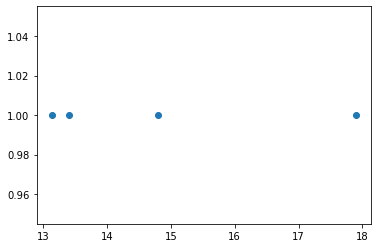

In [63]:
w, v = np.linalg.eig(H_oper)
print('eigenvalues: ',w)
plt.scatter(w,np.ones(len(w)))
print("minimum eigenvalue: ")
print(np.min(w))
print("minimum eigenvector: ")
print(v[:,np.argmin(w)])

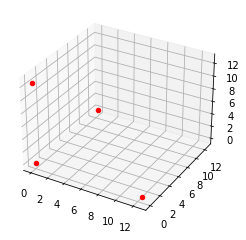

In [55]:
fig = plt.figure()
ax = fig.gca(projection='3d')

# plotting the points
for p in vertices:
    ax.scatter(p[0], p[1], p[2], zdir='z', c='r')


IndexError: index 4 is out of bounds for axis 1 with size 4

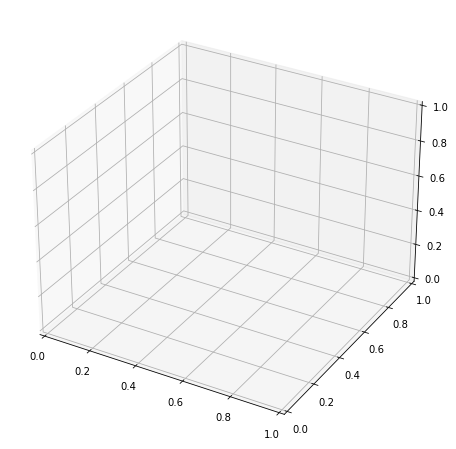

In [56]:

#fig = plt.figure(figsize=(8,6))

#ax = fig.add_subplot(111,projection='3d')
#colmap = cm.ScalarMappable(cmap=cm.hsv)
#colmap.set_array(v[:,4])

#print(v[:,4])
#print(max(v[:,4]))
#colors = cm.hsv(v[:,4]/max(v[:,4]))
#print(colors)

#yg = ax.scatter(vertices[:,0], vertices[:,1], vertices[:,2], c=colors, marker='o')
#cb = fig.colorbar(colmap)

# creating figures
fig = plt.figure(figsize=(8,8))
ax = fig.gca(projection='3d')

# setting color bar
#color_map = cm.ScalarMappable(cmap=cm.hot)
#color_map.set_array(v[:,4]/max(v[:,4]))
colors = v[:,4]/max(v[:,4])

print(v[:,4]/max(v[:,4]))
print(colors)

# creating the heatmap
map_1 = ax.scatter(vertices[:,0], vertices[:,1], vertices[:,2], c = colors,cmap='hot',s=200)

cbar = plt.colorbar(map_1,fraction=0.026, pad=0.04)
cbar.set_label('wavefunction amplitude')
plt.show()
fig.savefig('CO2_Ru_wavefunc.png',dpi=300)

In [ ]:
print(repr(H_oper))

In [ ]:
U = np.exp(2*np.pi*1j*H_oper)
print(repr(U))

In [ ]:
(1899*0+43*(1/8)+12*(2/8)+5*(3/8)+7*(4/8)+6*(-3/8)+18*(-2/8)+58*(-1/8))/2048